# Machine Learning Beginner Project: Linear Regression

In [32]:
# imprting all the packages
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
# loading dataset
df = pd.read_csv('../data/hou_all.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [7]:
#adding column name 
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV','BIAS_COL']
df.columns = col_names

- excluding the target variable 

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BIAS_COL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [9]:
df = df.iloc[:,:-1]

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
# defining feature and target
# feature
X = df.drop(columns=['MEDV'], axis=1)
# target
y = df['MEDV']

In [12]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [13]:
y.head(2)

0    24.0
1    21.6
Name: MEDV, dtype: float64

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [17]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [18]:
# predicting training set
pred = model.predict(X_test)

# performing cross validation
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [19]:
print("Linear Regression -\n  MAE:", mae, "MSE:" ,mse, "R2:" ,r2)

Linear Regression -
  MAE: 3.1890919658878416 MSE: 24.291119474973538 R2: 0.6687594935356317


- Mean Squared Error (MSE): It measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.
The ideal value of both MSE  is 0. The model gives the best result when the value are lower. Here,  MSE has significantly larger value i.e 19.573881758547856. MSE penalizes larger errors more than smaller ones due to squaring the differences. 

- Mean Absolute Error (MAE): It measures the average absolute difference between the actual and predicted values.
Lower MAE indicates better model performance.
The ideal value of both MAE is 0. The model gives the best result when the value are lower. Here, while the value of MAE is l3.182394167629652 .This means, on average, the model's predictions are off by about 3.18 units from the actual values. 

- R-squared (R2): It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
R2 ranges from 0 to 1, with higher values indicating better model performance.

The ideal value of both R-squares is 1. The model gives the best result when the value as high as possible, closer to 1. Here, the value of R2 is 6667024777797158. This means that about 67% of the variance in the target variable is explained by the model.

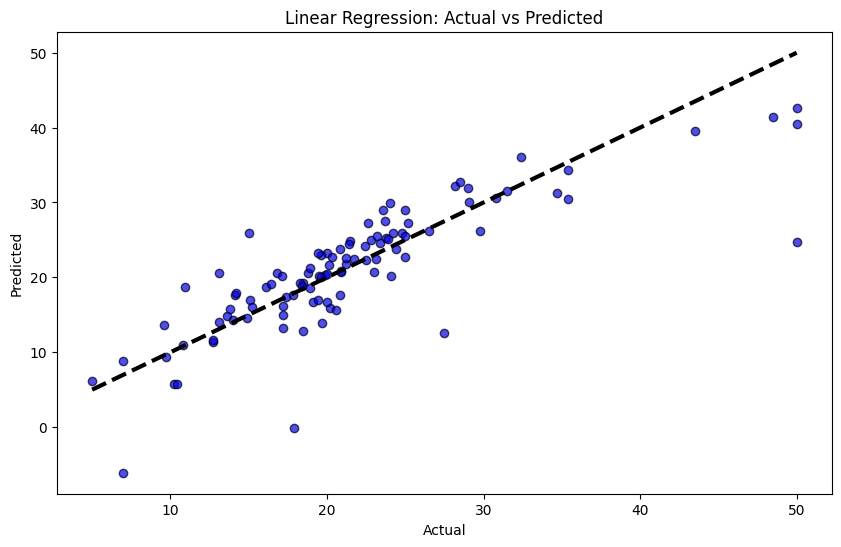

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


- Points that are close to the diagonal line indicate good predictions by the model. The closer the points are to the line, the better the model's performance.
- Points that are far from the diagonal line indicate larger errors in the predictions.The farther the points are from the line, the worse the model's performance for those observations.

## Appying Cross validation

In [21]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=6)

In [23]:
# getting best score
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Mean cross-validation score: 0.7275793491023103


The mean cross-validation score is approximately 0.728. This score represents the average performance of your model across the 6 folds of the cross-validation process

#### Hyperparameter 
For this, using Grid-search. It is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

## Using Ridge

In [75]:
# Defining parameter grid for Ridge regression
param_grid = {'alpha': [0.1, 1, 10, 100, 200]}
# Initialize the Ridge regression model
ridge = Ridge()

In [76]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 200]})

In [77]:
# Get the best model from the grid search
best_ridge_model = grid_search.best_estimator_
# Make predictions on the test set with the best model
pred_best = best_ridge_model.predict(X_test)

In [78]:

# Evaluate the best model's performance
mae_best = mean_absolute_error(y_test, pred_best)
mse_best = mean_squared_error(y_test, pred_best)
r2_best = r2_score(y_test, pred_best)

print(f"Ridge Regression - Best Alpha: {grid_search.best_params_['alpha']}, MAE: {mae_best}, MSE: {mse_best}, R2: {r2_best}")

Ridge Regression - Best Alpha: 0.1, MAE: 3.177282240159036, MSE: 19.565392366358747, R2: 0.6668470323150241


- These results are very close to those of the plain linear regression model, suggesting that the regularization effect of Ridge regression was minimal in this case.

## Using Lasso

In [36]:
param_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Lasso model
lasso = Lasso()

# Create GridSearchCV object
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_lasso, cv=5, scoring='r2')

# Perform grid search on the training data
grid_search_lasso.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search_lasso.best_params_}")
print(f"Best cross-validation score: {grid_search_lasso.best_score_}")

# Evaluate the best model on the test data
best_lasso = grid_search_lasso.best_estimator_
y_pred = best_lasso.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.7233931095757867
Mean Absolute Error: 3.160452414869678
Mean Squared Error: 24.30333560289059
R2 Score: 0.6685929109949444
